opis dodati

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
pd.pandas.set_option('display.max_columns', None)


from yellowbrick.target import FeatureCorrelation
from scipy.stats import norm
from scipy import stats


import warnings
warnings.filterwarnings("ignore")
color = sns.color_palette()
color_pal = [x['color'] for x in plt.rcParams['axes.prop_cycle']]

import os


In [2]:
for dirname, _, filenames in os.walk('data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

data\data.csv
data\data_by_artist.csv
data\data_by_genres.csv
data\data_by_year.csv
data\data_w_genres.csv


Dataset and attributes exploration

Primary:

id (Id of track generated by Spotify)
Numerical:

acousticness (Ranges from 0 to 1)
danceability (Ranges from 0 to 1)
energy (Ranges from 0 to 1)
duration_ms (Integer typically ranging from 200k to 300k)
instrumentalness (Ranges from 0 to 1)
valence (Ranges from 0 to 1)
popularity (Ranges from 0 to 100)
tempo (Float typically ranging from 50 to 150)
liveness (Ranges from 0 to 1)
loudness (Float typically ranging from -60 to 0)
speechiness (Ranges from 0 to 1)
year (Ranges from 1921 to 2020)

Dummy:

mode (0 = Minor, 1 = Major)
explicit (0 = No explicit content, 1 = Explicit content)

Categorical:

key (All keys on octave encoded as values ranging from 0 to 11, starting on C as 0, C# as 1 and so on…)
artists (List of artists mentioned)
release_date (Date of release mostly in yyyy-mm-dd format, however precision of date may vary)
name (Name of the song)

In [3]:
df = pd.read_csv('data/data.csv')
df.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.991000,['Mamie Smith'],0.598,168333,0.224,0,0cS0A1fUEUd1EW3FcF8AEI,0.000522,5,0.3790,-12.628,0,Keep A Song In Your Soul,12,1920,0.0936,149.976,0.6340,1920
1,0.643000,"[""Screamin' Jay Hawkins""]",0.852,150200,0.517,0,0hbkKFIJm7Z05H8Zl9w30f,0.026400,5,0.0809,-7.261,0,I Put A Spell On You,7,1920-01-05,0.0534,86.889,0.9500,1920
2,0.993000,['Mamie Smith'],0.647,163827,0.186,0,11m7laMUgmOKqI3oYzuhne,0.000018,0,0.5190,-12.098,1,Golfing Papa,4,1920,0.1740,97.600,0.6890,1920
3,0.000173,['Oscar Velazquez'],0.730,422087,0.798,0,19Lc5SfJJ5O1oaxY0fpwfh,0.801000,2,0.1280,-7.311,1,True House Music - Xavier Santos & Carlos Gomi...,17,1920-01-01,0.0425,127.997,0.0422,1920
4,0.295000,['Mixe'],0.704,165224,0.707,1,2hJjbsLCytGsnAHfdsLejp,0.000246,10,0.4020,-6.036,0,Xuniverxe,2,1920-10-01,0.0768,122.076,0.2990,1920


In [4]:
df.tail()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
174384,0.00917,"['DJ Combo', 'Sander-7', 'Tony T']",0.792,147615,0.866,0,46LhBf6TvYjZU2SMvGZAbn,0.00006,6,0.178,-5.089,0,The One,0,2020-12-25,0.0356,125.972,0.186,2020
174385,0.79500,['Alessia Cara'],0.429,144720,0.211,0,7tue2Wemjd0FZzRtDrQFZd,0.00000,4,0.196,-11.665,1,A Little More,0,2021-01-22,0.0360,94.710,0.228,2021
174386,0.80600,['Roger Fly'],0.671,218147,0.589,0,48Qj61hOdYmUCFJbpQ29Ob,0.92000,4,0.113,-12.393,0,Together,0,2020-12-09,0.0282,108.058,0.714,2020
174387,0.92000,['Taylor Swift'],0.462,244000,0.240,1,1gcyHQpBQ1lfXGdhZmWrHP,0.00000,0,0.113,-12.077,1,champagne problems,69,2021-01-07,0.0377,171.319,0.320,2021
174388,0.23900,['Roger Fly'],0.677,197710,0.460,0,57tgYkWQTNHVFEt6xDKKZj,0.89100,7,0.215,-12.237,1,Improvisations,0,2020-12-09,0.0258,112.208,0.747,2020


In [5]:
df.shape

(174389, 19)

In [6]:
df.isnull().sum()

acousticness        0
artists             0
danceability        0
duration_ms         0
energy              0
explicit            0
id                  0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
name                0
popularity          0
release_date        0
speechiness         0
tempo               0
valence             0
year                0
dtype: int64

In [7]:
df.drop(['id'], axis = 1, inplace = True)
df.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.991000,['Mamie Smith'],0.598,168333,0.224,0,0.000522,5,0.3790,-12.628,0,Keep A Song In Your Soul,12,1920,0.0936,149.976,0.6340,1920
1,0.643000,"[""Screamin' Jay Hawkins""]",0.852,150200,0.517,0,0.026400,5,0.0809,-7.261,0,I Put A Spell On You,7,1920-01-05,0.0534,86.889,0.9500,1920
2,0.993000,['Mamie Smith'],0.647,163827,0.186,0,0.000018,0,0.5190,-12.098,1,Golfing Papa,4,1920,0.1740,97.600,0.6890,1920
3,0.000173,['Oscar Velazquez'],0.730,422087,0.798,0,0.801000,2,0.1280,-7.311,1,True House Music - Xavier Santos & Carlos Gomi...,17,1920-01-01,0.0425,127.997,0.0422,1920
4,0.295000,['Mixe'],0.704,165224,0.707,1,0.000246,10,0.4020,-6.036,0,Xuniverxe,2,1920-10-01,0.0768,122.076,0.2990,1920


Explicit vs Non-explicit

<AxesSubplot:xlabel='explicit', ylabel='count'>

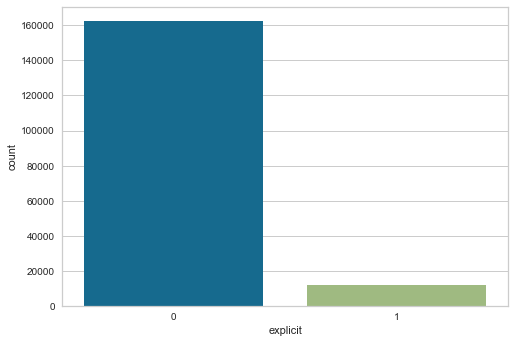

In [8]:
sns.countplot(df['explicit'])

Valence vs Year

Text(0, 0.5, 'Median valence')

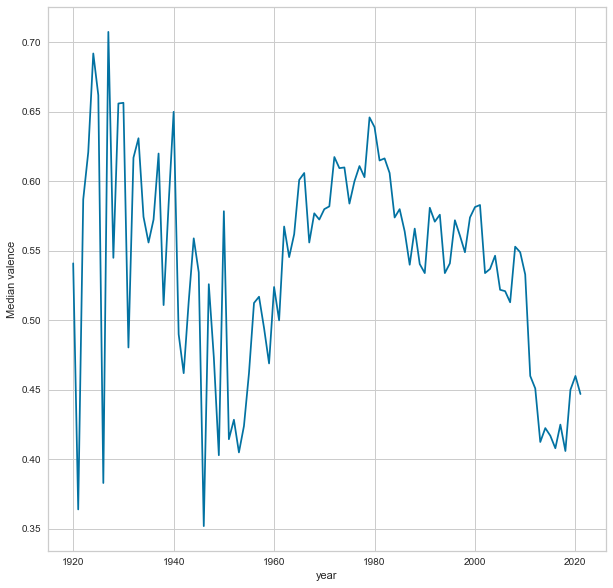

In [9]:
plt.figure(figsize = (10,10))
df.groupby('year')['valence'].median().plot()
plt.xlabel('year')
plt.ylabel('Median valence')

Energy vs Year

Text(0, 0.5, 'Median energy')

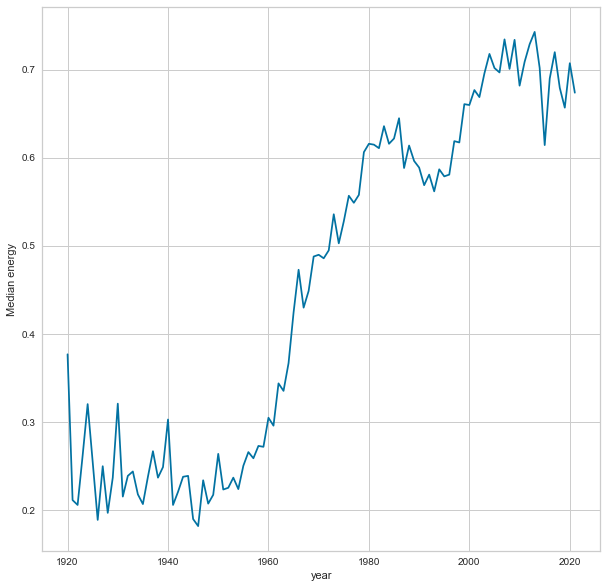

In [10]:
plt.figure(figsize = (10,10))
df.groupby('year')['energy'].median().plot()
plt.xlabel('year')
plt.ylabel('Median energy')

Popularity vs Year

Text(0, 0.5, 'Median popularity')

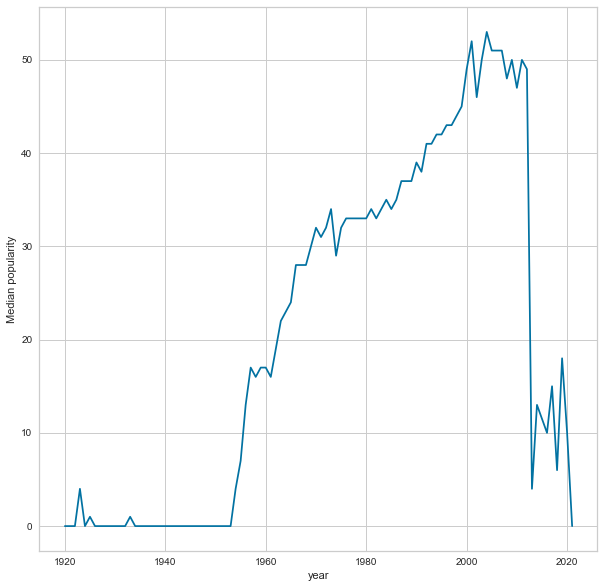

In [11]:
plt.figure(figsize = (10,10))
df.groupby('year')['popularity'].median().plot()
plt.xlabel('year')
plt.ylabel('Median popularity')

Loudness vs Year

Text(0, 0.5, 'Median loudness')

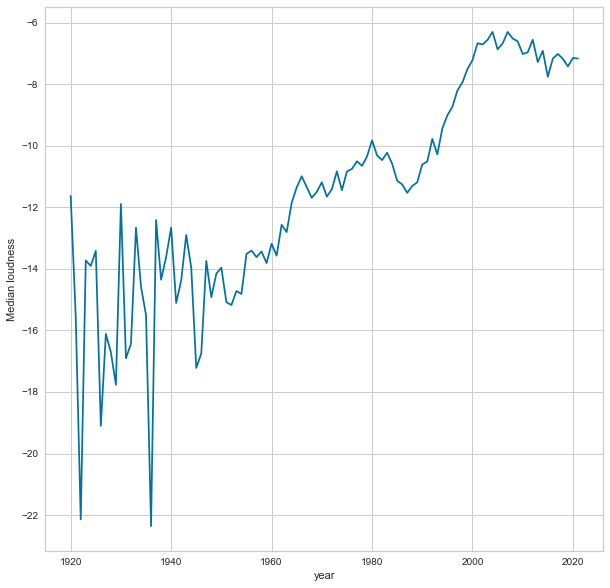

In [12]:
plt.figure(figsize = (10,10))
df.groupby('year')['loudness'].median().plot()
plt.xlabel('year')
plt.ylabel('Median loudness')

Speechiness vs Year

Text(0, 0.5, 'Median speechiness')

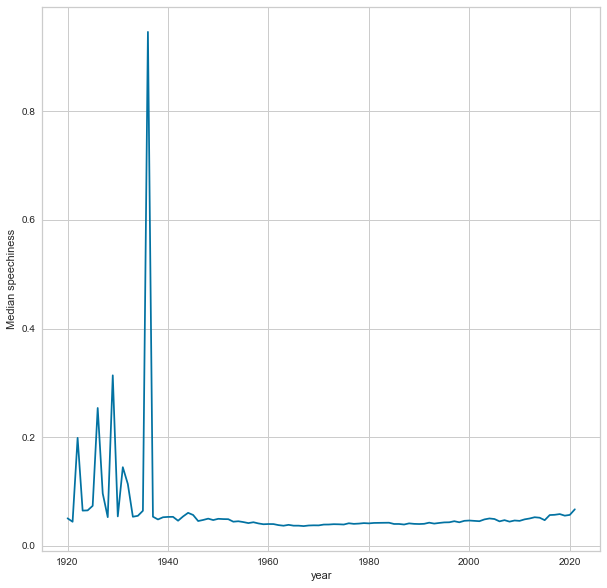

In [13]:
plt.figure(figsize = (10,10))
df.groupby('year')['speechiness'].median().plot()
plt.xlabel('year')
plt.ylabel('Median speechiness')

Tempo vs Year

Text(0, 0.5, 'Median tempo')

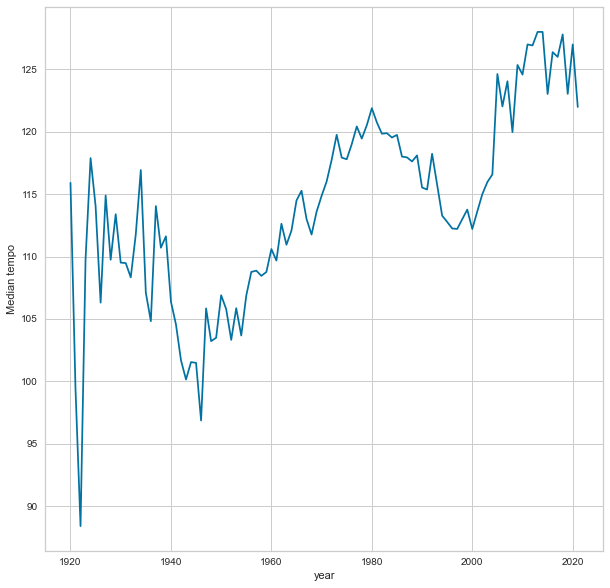

In [14]:
plt.figure(figsize = (10,10))
df.groupby('year')['tempo'].median().plot()
plt.xlabel('year')
plt.ylabel('Median tempo')

Liveness vs Year

Text(0, 0.5, 'Median liveness')

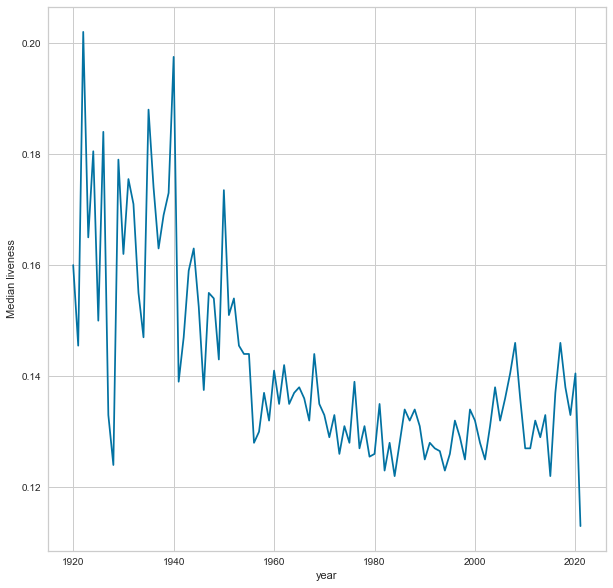

In [15]:
plt.figure(figsize = (10,10))
df.groupby('year')['liveness'].median().plot()
plt.xlabel('year')
plt.ylabel('Median liveness')

Instrumentalness vs Year

Text(0, 0.5, 'Median instrumentalness')

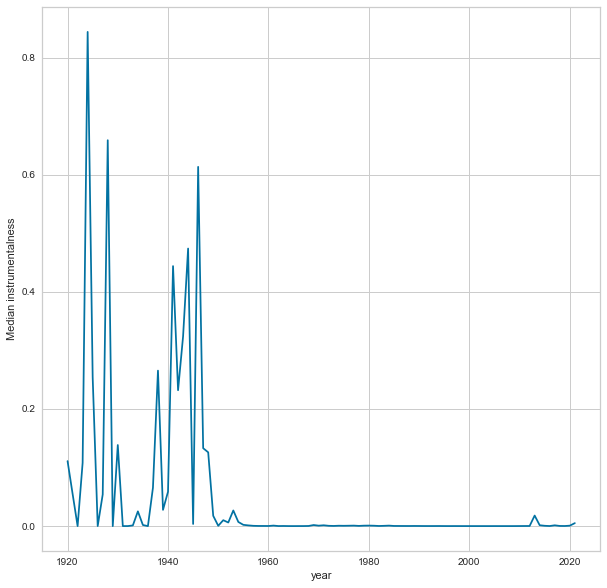

In [16]:
plt.figure(figsize = (10,10))
df.groupby('year')['instrumentalness'].median().plot()
plt.xlabel('year')
plt.ylabel('Median instrumentalness')


Duration of song vs Year

Text(0, 0.5, 'Median duration_ms')

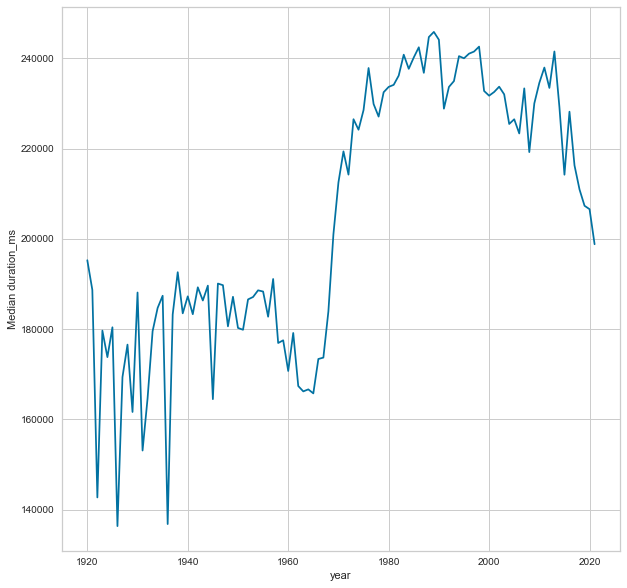

In [17]:
plt.figure(figsize = (10,10))
df.groupby('year')['duration_ms'].median().plot()
plt.xlabel('year')
plt.ylabel('Median duration_ms')

Acousticness vs Year

Text(0, 0.5, 'Median acousticness')

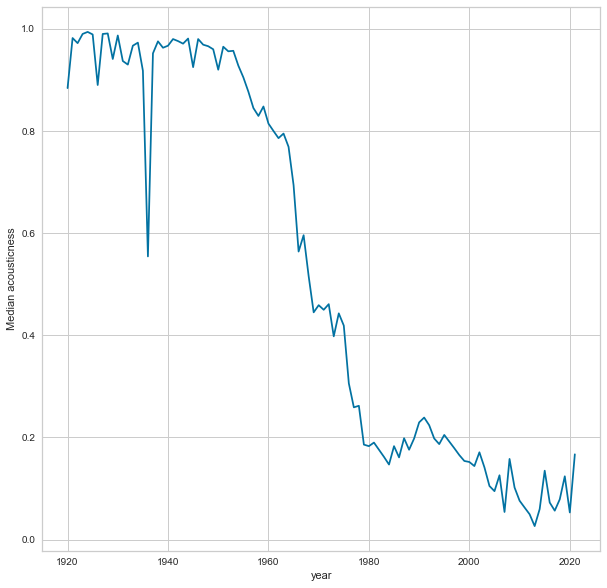

In [18]:
plt.figure(figsize = (10,10))
df.groupby('year')['acousticness'].median().plot()
plt.xlabel('year')
plt.ylabel('Median acousticness')

Correlation exploration

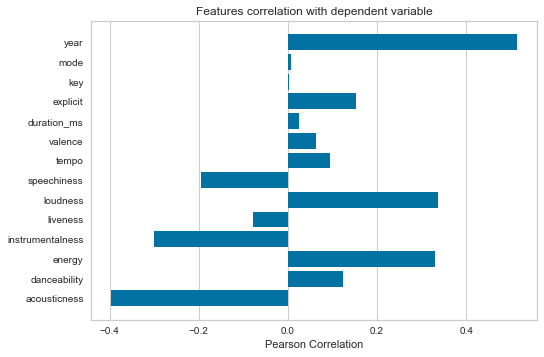

<AxesSubplot:title={'center':'Features correlation with dependent variable'}, xlabel='Pearson Correlation'>

In [19]:
feature_names = ['acousticness', 'danceability', 'energy', 'instrumentalness',
       'liveness', 'loudness', 'speechiness', 'tempo', 'valence','duration_ms','explicit','key','mode','year']

X, y = df[feature_names], df['popularity']

# Create a list of the feature names

features = np.array(feature_names)

# Instantiate the visualizer
visualizer = FeatureCorrelation(labels=features)

plt.rcParams['figure.figsize']=(20,20)
visualizer.fit(X, y)        # Fit the data to the visualizer
visualizer.show()       

Features plot

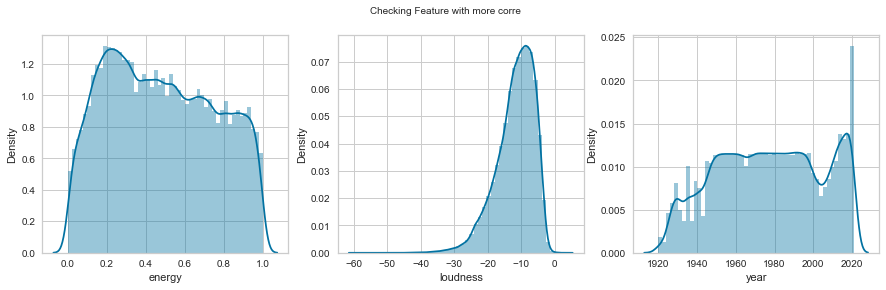

In [21]:
features_o = ['energy','loudness','year']

plt.rcParams['figure.figsize'] = (15, 4)

plt.subplot(1, 3, 1)
sns.distplot(df['energy'])

plt.subplot(1, 3, 2)
sns.distplot(df['loudness'])

plt.subplot(1, 3, 3)
sns.distplot(df['year'])

plt.suptitle('Checking Feature with more corre ', fontsize = 10)
plt.show()

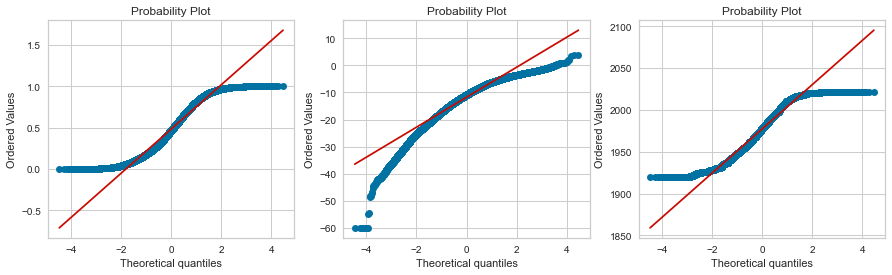

In [22]:
plt.rcParams['figure.figsize'] = (15, 4)

plt.subplot(1, 3, 1)
res = stats.probplot(df['energy'], plot=plt)

plt.subplot(1, 3, 2)
res = stats.probplot(df['loudness'], plot=plt)

plt.subplot(1, 3, 3)
res = stats.probplot(df['year'], plot=plt)